## 随机事件与随机变量（6.22）
### 理论部分

**基本概念：** 随机事件，样本空间等；  
**概率基础：** 古典概型，条件概率，贝叶斯公式；  
**随机变量及其分布特征**  
### 练习部分：
- 做理论知识点的笔记；
- python实现二项分布，协方差和相关系数以及贝叶斯公式；

#### 理论知识点的笔记  


##### **随机实验$E$**满足以下三个条件: 

1. 可以在相同条件下重复进行；
2. 结果有多种可能性，并且所有可能结果事先已知；
3. 作一次试验究竟哪个结果出现，事先不能确定。

##### **贝叶斯公式**  
在实际中，常取对样本空间  $\Omega$ 的有限划分 $B_1,B_2,...,B_n$ 。  
- $B_i$ 视为导致试验结果 $A$ 发生的“原因”，而$P(B_i)$ 表示各种“原因”发生的可能性大小，故称为**先验**概率；
- $P(B_i|A)$ 则反应当试验产生了结果 $A$ 之后，再对各种“原因”概率的新认识，故称为**后验**概率 。

##### **协方差和相关系数**都是描述随机变量 $X$ 与随机变量 $Y$ 之间的**线性联系**程度的数字量。

- 计算公式 $Cov(X，Y) =E( XY) -E( X)E(Y) $ ;  $E( XY) $ 为 $X，Y$ 联合分布**乘积**的期望，相互独立时，有 $Cov(X，Y) = 0$;
     
- $\rho（X,Y） = \frac{Cov(X，Y)}{\sqrt {Var(X)} \sqrt {Var(Y)}}$
  为  $X,Y$ 的相关系数，它是无纲量的量（也就是说没有单位，只是个代数值）。

- 基本上我们都会用相关系数来衡量两个变量之间的相关程度。相关系数在-1到1之间，小于零表示负相关，大于零表示正相关。绝对值 $|\rho（X,Y）|$ 表示相关度的大小。越接近1，相关度越大。

#### python实现二项分布，协方差和相关系数以及贝叶斯公式；

In [85]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return (n*factorial(n-1))
    
# 二项分布
def Binomial(n,k,p):
    if n>=k and p>=0 and p<=1:
        Cnk = factorial(n)/factorial(k)/factorial(n-k)
        return Cnk*(p**k)*((1-p)**(n-k))
    else:
        return -1
    
print(Binomial(5,2,0.5))

0.3125


In [86]:
A = [1,2,1,3,4]
P = [.2,.2,.2,.2,.2]
B = [2,1,2,6,7]
AB= [a*b for a,b in zip(A,B)]
PQ= Q = P

#期望
def Exp(A,P):
    return sum(a*p for a,p in zip(A,P))
#标准差
from math import sqrt
def Std(A,P):
    E = Exp(A,P)
    Var = sum((a-E)**2*p for a,p in zip(A,P))
    return sqrt(Var)

#协方差 = 联合分布期望 - 单独期望乘积
#计算前提，已知XY联合分布
#Cov(A,B) = E(XY) - E(X)E(Y)
#AB 为A，B联合分布，PQ为AB分布率

def Cov(A,B,AB,P,Q,PQ):
    return Exp(AB,PQ)-Exp(A,P)*Exp(B,Q)
#相关系数
def rho(A,B,AB,P,Q,PQ):
    return Cov(A,B,AB,P,Q,PQ)/(Std(A,P)*Std(B,Q))
print(rho(A,B,AB,P,Q,PQ))

0.8799860814956723


In [87]:
#Bayes公式
# PAB:[P(A|Bi)],PB:[P(Bi)]
def Bayes(PAB,PB,i):
    if sum(p for p in PB)!=1:
        return -1
    base = sum(p*q for p,q in zip(PAB,PB))
    PBiA = PAB[i-1]*PB[i-1]/base
    return PBiA

PAB = [0.95,0.1]
PB  = [0.0004,1-0.0004]
print(Bayes(PAB,PB,1))

0.003787123779150887


## Task2：数理统计与描述性分析（6.24）
### 理论部分

- 统计量与抽样；常用统计量；  
- 数据集中与离散趋势的度量；  
- 分布特征，偏度与峰度；  

### 练习部分
- 做理论知识点的笔记；  
- python实现数据各维度的描述性分析；

### 理论知识点的笔记
#### 统计量与抽样
**总体的两重性：**  
- 在数理统计中，称研究对象的全体为**总体**，通常用一个随机变量表示总体。
- 数理统计学中的总体是指与总体相联系的某个(或某几个)数量指标 $X$ 取值的全体。比如，该批元件的使用寿命 $X$ 的取值全体就是研究对象的总体。显然 $X$ 是随机变量，这时，就称 $X$ 为总体。  

**样本的两重性：**
- 在一次具体地抽样后它是一组确定的数值。
- 在一般叙述中样本也是一组随机变量，因为抽样是随机、独立的。  

一般地，用 $X_1,X_2,...，X_n$ , 表示随机样本，它们取到的值记为 $x_1,x_2,...，x_n$ 称为样本观测值。样本作为随机变量，有一定的概率分布，这个概率分布称为样本分布。显然，样本分布取决于总体的性质和样本的性质。  

**简单随机样本：**  
$ x_1,x_2,...,x_n $ 相互独立，且每个 $x_i$ 与 $X$ 同分布，则称$ x_1,x_2,...,x_n $ 为，简称样本.通常把 $n$ 称为样本容量。

**统计推断：** 计算样本统计量，以反应总体的相关信息。


#### 常用统计量

- 样本均值
- 样本方差，系数修正为$1/(n-1)$
- $k$阶样本原点距，均值定义的扩充
- $k$阶样本中心距，方差定义的扩充
- 顺序统计量，样本按大小排序后的相对位置关系


#### 描述性统计

##### 数据集中趋势的度量
- 均值、中位数（或百分位数）、众数（频数最大的）

|        |                         优点                         |       缺点       |
| :----: | :--------------------------------------------------: | :--------------: |
|  均值  |              充分利用所有数据，适用性强              | 容易受极端值影响 |
| 中位数 |                    不受极端值影响                    |    缺乏敏感性    |
|  众数  | 不受极端值影响；当数据具有明显的集中趋势时，代表性好 |    缺乏唯一性    |

##### 数据离散趋势的度量

- 方差，标准差，极差（或四分位差）以及变异系数（标准差归一化）等。

##### 偏度与峰度

**偏度（skewness）：**样本的标准三阶中心矩。统计数据分布非对称程度的数字特征。直观看来就是密度函数曲线尾部的相对长度。**偏度刻画的是分布函数（数据）的对称性。**关于均值对称的数据【正态分布】其偏度系数为0，右侧更分散的数据偏度系数为正（有少数变量值很大，使曲线右侧尾部拖得很长），左侧更分散的数据偏度系数为负（有少数变量值很小，使曲线左侧尾部拖得很长）。

**峰度（kurtosis）：**样本的标准四阶中心矩。说明的是分布曲线在平均值处峰值高低的特征数。直观看来，峰度反映了峰部的尖度。样本的峰度是和【正态分布】相比较而言统计量，如果峰度大于3，峰的形状比较尖，比正态分布峰要陡峭。反之亦然。**峰度刻画的是分布函数的集中和分散程度。**


#### python实现数据各维度的描述性分析

In [133]:
import numpy as np
import pandas as pd
a = [1,2,4,5,3,12,12,23,43,52,11,22,22,22]
#a = [1,2,3]
a_mean = np.mean(a)  #均值
a_med  = np.median(a)  #中位数
print("a的平均数:",a_mean)
print("a的中位数:",a_med)

ser = pd.Series(a)
a_m = ser.mode()
print("a的众数:",a_m.values)


a的平均数: 16.714285714285715
a的中位数: 12.0
a的众数: [22]


In [134]:
#对pd.Series类型
ser.describe()

count    14.000000
mean     16.714286
std      15.409431
min       1.000000
25%       4.250000
50%      12.000000
75%      22.000000
max      52.000000
dtype: float64

In [135]:
#numpy计算方差时，使用的是原始系数1/n
a_var1 = np.var(a)  #方差  1/n
a_std1 = np.std(a)  #标准差1/n
a_mean1 = np.mean(a)  #均值
a_cv1  = 100*a_std1 /a_mean1 #变异系数

#pandas计算方差时，使用的是修正系数1/(n-1)
a_var2 = ser.var()  #方差  1/(n-1)
a_std2 = ser.std()  #标准差1/(n-1)
a_mean2 = ser.mean()
a_cv2  = 100*a_std2 /a_mean2 #变异系数

print("a的方差:",a_var1,a_var2)
print("a的标准差:",a_std1,a_std2)
print("a的变异系数:",a_cv1,a_cv2)

a的方差: 220.4897959183673 237.4505494505494
a的标准差: 14.848898811641464 15.409430536218702
a的变异系数: 88.83956553973525 92.19317414831701


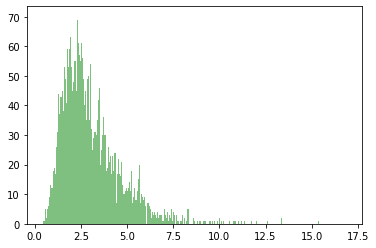

偏度系数 1.740618995808539
峰度系数 5.453029574013017


In [136]:
import matplotlib.pyplot as plt
import random
SAMPLE_SIZE = 10000
#生成对数正态分布
mu = 1
sigma = 0.5
data = [random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]

#生成标准正态分布的随机数
#data = list(np.random.randn(SAMPLE_SIZE))
plt.hist(data,1000,facecolor='g',alpha=0.5)
'''
plt.hist(arr, bins=10, facecolor, edgecolor,alpha，histtype='bar')
bins：直方图的柱数，可选项，默认为10
alpha: 透明度
'''
plt.show()
s = pd.Series(data) #将数组转化为序列
print('偏度系数',s.skew())
print('峰度系数',s.kurt())

## Task3：常见分布与假设检验（6.27）
### 理论部分
- 离散型分布，连续型分布，python实现及可视化；
- 假设检验步骤及两类错误解读；
- 假设检验的python实战；

### 练习部分
- 做理论知识点的笔记；
- python实现常见分布，python实现假设检验；

### 理论知识点的笔记
#### 常见分布
**连续型随机变量**  
- 连续型随机变量在于取任何固定值的概率都为0

**二项分布，泊松分布，正态分布的关系**
- 当n很大，p很小时，如*n* ≥ 100 and *np* ≤ 10时，二项分布可以近似为泊松分布。
- 当λ很大时，如λ≥1000时，泊松分布可以近似为正态分布。
- 当n很大时，np和n(1-p)都足够大时，如n ≥ 100 , np  ≥10，n(1-p) ≥10时，二项分布可以近似为正态分布。

- 一般正态分布，可以通过公式变换将其转变为标准正态分布 Z ~ N(0,1)，$ Z=\frac {X-μ} {σ} $

#### 假设检验

### Python实现
#### 常见分布

In [15]:
import numpy as np

#离散型
# 生成大小为1000的符合b(10,0.5)【二项分布】的样本集
s = np.random.binomial(n=10,p=0.5,size=1000)
# 生成大小为1000的符合P(1)的【泊松分布】的样本集
s = np.random.poisson(lam=1,size=1000)

#连续型
# 生成大小为1000的符合U(0,1)均匀分布的样本集，注意在此方法中边界值为左闭右开区间
s = np.random.uniform(low=0,high=1,size=1000)
# 生成大小为1000的符合N(0,1)正态分布的样本集，可以用normal函数自定义均值，标准差，也可以直接使用standard_normal函数
s = np.random.normal(loc=0,scale=1,size=1000)
s = np.random.standard_normal(size=1000)
# 生成大小为1000的符合E(1/2)指数分布的样本集，注意该方法中的【参数scale为指数分布参数λ的倒数】
s = np.random.exponential(scale=2,size=1000)


#### 计算PMF和PDF

In [23]:
from scipy import stats

# 计算二项分布B(10,0.5)的PMF
x=range(11)
p=stats.binom.pmf(x, n=10, p=0.5)

# 计算泊松分布P(1)的PMF
x=range(11)
p=stats.poisson.pmf(x, mu=1)

# 计算均匀分布U(0,1)的PDF
x = numpy.linspace(0,1,100)#生成0-1等间隔100个数
p= stats.uniform.pdf(x,loc=0, scale=1)

# 计算正态分布N(0,1)的PDF
x = numpy.linspace(-3,3,1000)
p= stats.norm.pdf(x,loc=0, scale=1)

# 计算指数分布E(1)的PDF
x = numpy.linspace(0,10,1000)
p= stats.expon.pdf(x,loc=10,scale=1)

#### 计算CDF

In [24]:
# 以正态分布为例，计算正态分布N(0,1)的CDF
x = numpy.linspace(-3,3,1000)
p = stats.norm.cdf(x,loc=0, scale=1)

#### 统计分布可视化

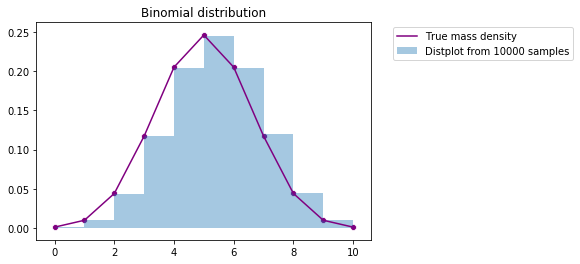

In [40]:
#二项分布
#比较n=10，p=0.5的二项分布的真实概率质量和10000次随机抽样的结果
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#准备数据
x = range(11)  # 二项分布成功的次数（X轴）
t = stats.binom.rvs(10,0.5,size=10000) # B(10,0.5)随机抽样10000次
p = stats.binom.pmf(x, 10, 0.5) # B(10,0.5)真实概率质量

#画图
fig, ax = plt.subplots(1, 1)

# 分割为bins段，density转为比例，kde拟合连续概率密度曲线
sns.distplot(t,bins=10,hist_kws={'density':True}, kde=False,label = 'Distplot from 10000 samples')

sns.scatterplot(x,p,color='purple')#真实概率质量，描点，连线
sns.lineplot(x,p,color='purple',label='True mass density')

plt.title('Binomial distribution')
plt.legend(bbox_to_anchor=(1.05, 1))

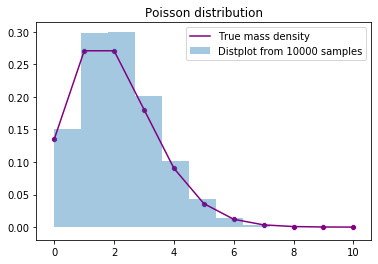

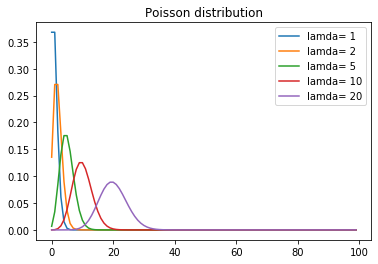

In [41]:
# 泊松分布
#比较λ=2的泊松分布的真实概率质量和10000次随机抽样的结果

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
x=range(11)
t= stats.poisson.rvs(2,size=10000)
p=stats.poisson.pmf(x, 2)

fig, ax = plt.subplots(1, 1)
sns.distplot(t,bins=10,hist_kws={'density':True}, kde=False,label = 'Distplot from 10000 samples')
sns.scatterplot(x,p,color='purple')
sns.lineplot(x,p,color='purple',label='True mass density')
plt.title('Poisson distribution')
plt.legend()


#比较不同参数λ对应的概率质量函数，可以验证随着参数增大，泊松分布开始逐渐变得对称，分布也越来越均匀，趋近于正态分布
x=range(100)
fig, ax = plt.subplots()
for  lam in [1,2,5,10,20] :
        p=stats.poisson.pmf(x, lam)
        sns.lineplot(x,p,label='lamda= '+ str(lam))
plt.title('Poisson distribution')
plt.legend()

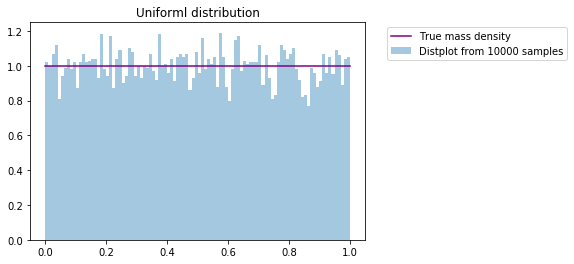

In [45]:
#均匀分布
#比较U(0,1)的均匀分布的真实概率密度和10000次随机抽样的结果
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
x= numpy.linspace(0,1,1000)
t= stats.uniform.rvs(0,1,size=10000)
p=stats.uniform.pdf(x, 0, 1)

fig, ax = plt.subplots(1, 1)
sns.distplot(t,bins=100,hist_kws={'density':True}, kde=False,label = 'Distplot from 10000 samples')

sns.lineplot(x,p,color='purple',label='True mass density')
plt.title('Uniforml distribution')
plt.legend(bbox_to_anchor=(1.05, 1))

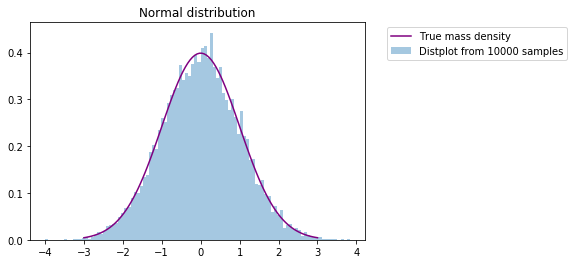

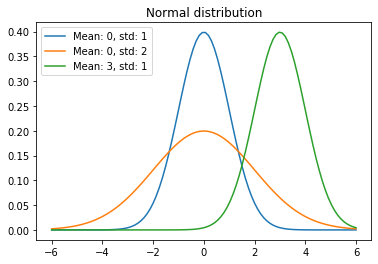

In [47]:
#正态分布
#比较N(0,1)的正态分布的真实概率密度和10000次随机抽样的结果

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
x=numpy.linspace(-3,3,100)
t= stats.norm.rvs(0,1,size=10000)
p=stats.norm.pdf(x, 0, 1)

fig, ax = plt.subplots(1, 1)
sns.distplot(t,bins=100,hist_kws={'density':True}, kde=False,label = 'Distplot from 10000 samples')


sns.lineplot(x,p,color='purple',label='True mass density')
plt.title('Normal distribution')
plt.legend(bbox_to_anchor=(1.05, 1))

#比较不同均值和标准差组合的正态分布的概率密度函数
x=numpy.linspace(-6,6,100)
p=stats.norm.pdf(x, 0, 1)
fig, ax = plt.subplots()
for  mean, std in [(0,1),(0,2),(3,1)]: 
        p=stats.norm.pdf(x, mean, std)
        sns.lineplot(x,p,label='Mean: '+ str(mean) + ', std: '+ str(std))
plt.title('Normal distribution')
plt.legend()

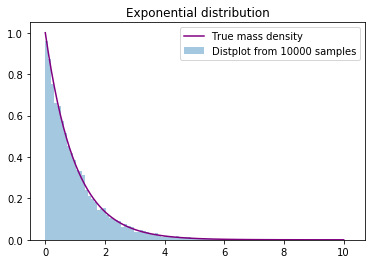

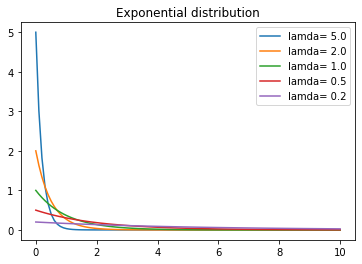

In [48]:
#指数分布
#比较E(1)的指数分布的真实概率密度和10000次随机抽样的结果
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
x=numpy.linspace(0,10,100)
t= stats.expon.rvs(0,1,size=10000)
p=stats.expon.pdf(x, 0, 1)

fig, ax = plt.subplots(1, 1)
sns.distplot(t,bins=100,hist_kws={'density':True}, kde=False,label = 'Distplot from 10000 samples')


sns.lineplot(x,p,color='purple',label='True mass density')
plt.title('Exponential distribution')
plt.legend(bbox_to_anchor=(1, 1))
#比较不同参数的指数分布的概率密度函数
x=numpy.linspace(0,10,100)
fig, ax = plt.subplots()
for  scale in [0.2,0.5,1,2,5] :
        p=stats.expon.pdf(x, scale=scale)
        sns.lineplot(x,p,label='lamda= '+ str(1/scale))
plt.title('Exponential distribution')
plt.legend()

#### 正态检验

Shapiro-Wilk Test是一种经典的正态检验方法。

H0: 样本总体服从正态分布

H1: 样本总体不服从正态分布 

In [59]:
import numpy as np
from scipy.stats import shapiro

data_nonnormal = np.random.exponential(size=100)#scale=1指数分布样本
data_normal = np.random.normal(1,5,size=100)    #正态分布样本

def normal_judge(data):
    stat, p = shapiro(data)
    if p > 0.05:
        return 'stat={:.3f}, p = {:.3f}, probably gaussian'.format(stat,p)
    else:
        return 'stat={:.3f}, p = {:.3f}, probably not gaussian'.format(stat,p)

# output
normal_judge(data_nonnormal)
# 'stat=0.850, p = 0.000, probably not gaussian'
normal_judge(data_normal)
# 'stat=0.987, p = 0.415, probably gaussian'

'stat=0.991, p = 0.737, probably gaussian'

#### 卡方检验

目的：检验两组类别变量是相关的还是独立的

H0: 两个样本是独立的

H1: 两组样本不是独立的

**关联检验**

关联检验常用的只有卡方检验一种，适用于预测变量和结果变量均为类别型的情况。

In [62]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  12]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

# output
#stat=0.272, p=0.873
#Probably independent

stat=0.432, p=0.806
Probably independent


#### T-test

目的：检验两个独立样本集的**【均值】**是否具有显著差异

H0: 均值是相等的

H1: 均值是不等的

**比较检验**

比较检验适用于预测变量是类别型，结果变量是数值型的情况，

In [70]:
from scipy.stats import ttest_ind
import numpy as np
data1 = np.random.normal(size=10)
data2 = np.random.normal(1,size=10)
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
# output
# stat=-1.382, p=0.184
# Probably the same distribution

stat=-3.454, p=0.003
Probably different distributions


#### ANOVA

目的：与t-test类似，ANOVA可以检验两组及以上独立样本集的均值是否具有显著差异

H0: 均值是相等的

H1: 均值是不等的

In [73]:
from scipy.stats import f_oneway
import numpy as np
data1 = np.random.normal(size=10)
data2 = np.random.normal(.2,size=10)
data3 = np.random.normal(.5,size=10)
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
 
# output
# stat=0.189, p=0.829
# Probably the same distribution

stat=1.057, p=0.361
Probably the same distribution


#### Mann-Whitney U Test

目的：检验两个样本集的**【分布】**是否相同

H0: 两个样本集的分布相同

H1: 两个样本集的分布不同

In [75]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

# output
# stat=40.000, p=0.236
# Probably the same distribution

stat=40.000, p=0.236
Probably the same distribution
